In [40]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as pltcolor
import numpy.linalg as lg
from math import *

#### 1. Загрузите данные ex7data1.mat из файла.

In [41]:
data1 = scio.loadmat('data/Lab 7/ex7data1.mat')
X = data1['X']

#### 2. Постройте график загруженного набора данных.

[0.5, 6.5, 2, 8]

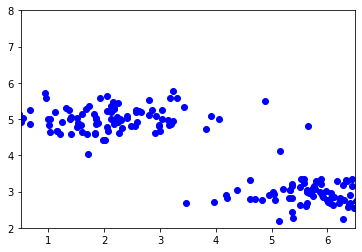

In [42]:
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.axis([0.5, 6.5, 2, 8])

#### 3. Реализуйте функцию вычисления матрицы ковариации данных.

In [43]:
def covarianceMatrix(X):
    m, n = np.shape(X)
    return 1 / m * X.T.dot(X)

#### 4. Вычислите координаты собственных векторов для набора данных с помощью сингулярного разложения матрицы ковариации (разрешается использовать библиотечные реализации матричных разложений).

In [44]:
def pca(X):
    sigma = covarianceMatrix(X)
    U, S, _ = lg.svd(sigma)
    return U, S

5. Постройте на графике из пункта 2 собственные векторы матрицы ковариации.

In [45]:
def drawLine(p1, p2):
    x = np.array([p1[0], p2[0]])
    y = np.array([p1[1], p2[1]])
    plt.plot(x, y)

In [46]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


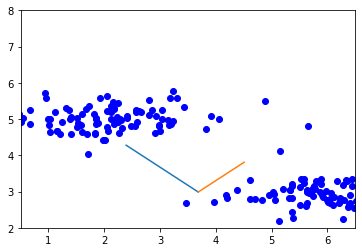

In [47]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)

plt.plot(X[:, 0], X[:, 1], 'bo')
plt.axis([0.5, 6.5, 2, 8])
drawLine(mu, mu + 1.5 * S[0] * U[:, 0])
drawLine(mu, mu + 1.5 * S[1] * U[:, 1])
plt.show()

#### 6. Реализуйте функцию проекции из пространства большей размерности в пространство меньшей размерности с помощью метода главных компонент.


In [48]:
def projectData(X, U, K):
    z = X @ U[:, 0:K]
    return z

#### 7. Реализуйте функцию вычисления обратного преобразования.

In [49]:
  
def recoverData(Z, U, K):
    X_rec = np.asmatrix(Z) @ U[:, 0:K].T
    return np.asarray(X_rec)

#### 8. Постройте график исходных точек и их проекций на пространство меньшей размерности (с линиями проекций).

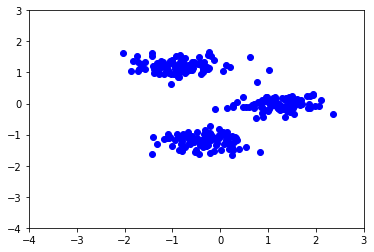

[ 1.35651976e+00  3.57648859e-02 -8.52348172e-01  9.68501478e-01
  9.85575792e-01  1.71112887e+00  1.23480945e+00  1.40035243e+00
  1.03513205e+00  1.02232828e+00  1.57781605e+00  1.50602418e+00
  1.54504028e+00  1.51597851e+00  1.99490502e+00  1.20824544e+00
  7.04398126e-01  9.58671352e-01  1.89918951e+00  9.67852638e-01
  1.97224267e+00  1.03063707e+00  1.70684183e+00  2.05552077e+00
  1.75890728e+00  1.52237032e+00  1.25681228e+00  1.84356868e+00
  1.83974012e+00  1.50393906e+00  1.30301516e+00  1.21781128e+00
  1.30519363e+00  1.23512510e+00  1.45652578e+00  1.36839541e+00
  1.63919738e+00  1.55758063e+00  1.35043535e+00  1.54279596e+00
  1.69420327e+00  1.21491809e+00  1.39173884e+00  2.09117734e+00
  1.65639212e+00  1.34021845e+00  1.18492894e+00  6.85896441e-01
  1.40954448e+00  1.33982006e+00  1.58623423e+00  1.46072430e+00
  1.18561122e+00  1.16351426e+00  1.07928131e+00  9.62129435e-01
  2.04538643e+00  1.70918775e+00  1.34269285e+00  1.80551035e+00
  1.16883192e+00  1.73566

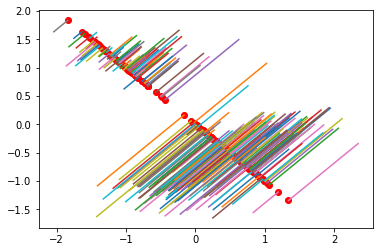

In [50]:
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.axis([-4, 3, -4, 3])
plt.show()

K = 1
Z = projectData(X_norm, U, K)
print(Z.flatten())
X_rec = recoverData(Z, U, K)
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro')

for i in range(np.size(X_norm, 0)):
    drawLine(X_norm[i, :], X_rec[i, :])

plt.show()

#### 9. Загрузите данные ex7faces.mat из файла.

In [51]:
def displayData(X):
    # Compute rows, cols 100x400
    m, n = np.shape(X)
    example_width = round(sqrt(n))
    example_height = int(n / example_width)
    # Compute number of items to display
    display_rows = floor(sqrt(m))
    display_cols = ceil(m / display_rows)
    # Between images padding
    pad = 1
    # Setup blank display
    row = pad + display_rows * (example_height + pad)
    col = pad + display_cols * (example_width + pad)
    display_array = -np.ones((row, col), dtype=float)
    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex >= m:
                break
            # Copy the patch
            # Get the max value of the patch
            max_val = max(abs(X[curr_ex, :]))
            i_1 = pad + j * (example_height + pad)
            i_2 = pad + i * (example_width + pad)
            display_array[i_1:i_1 + example_height, i_2:i_2 + example_width] = X[curr_ex,:].reshape(example_height, example_width).T / max_val
            curr_ex += 1
        if curr_ex >= m:
            break
    plt.imshow(display_array, cmap='gray')

In [52]:
face = scio.loadmat('data/Lab 7/ex7faces.mat')
X = face['X']  # 5000x1024

#### 10. Визуализируйте 100 случайных изображений из набора данных.

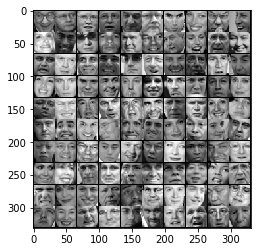

In [53]:
displayData(X[:100, :])
plt.show()

#### 11. С помощью метода главных компонент вычислите собственные векторы.

In [54]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)

#### 12. Визуализируйте 36 главных компонент с наибольшей дисперсией.

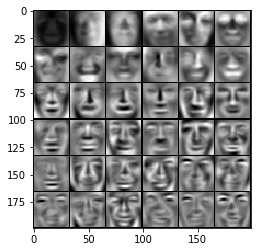

In [55]:
displayData(U[:, 0:36].T)
plt.show()

#### 13. Как изменилось качество выбранных изображений?

In [56]:
K = 36
Z = projectData(X_norm, U, K)
      

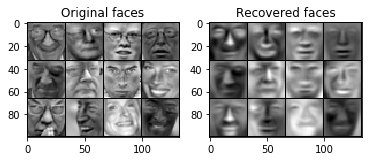

In [57]:
X_rec = recoverData(Z, U, K)
plt.subplot(121)
displayData(X_norm[0:12, :])
plt.title('Original faces')
plt.subplot(122)
displayData(X_rec[0:12, :])
plt.title('Recovered faces')
plt.show()

Можно заметить, что фотографии стали сильно размытыми.

#### 14. Визуализируйте 100 главных компонент с наибольшей дисперсией.

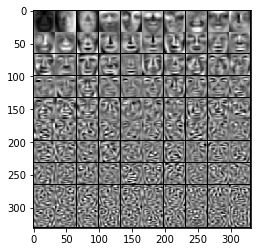

In [58]:
displayData(U[:, 0:100].T)
plt.show()

#### 15. Как изменилось качество выбранных изображений?

In [59]:
K = 100
Z = projectData(X_norm, U, K)

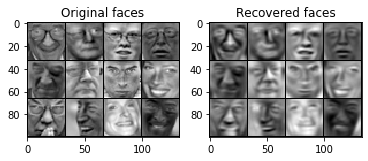

In [60]:
X_rec = recoverData(Z, U, K)
plt.subplot(121)
displayData(X_norm[0:12, :])
plt.title('Original faces')
plt.subplot(122)
displayData(X_rec[0:12, :])
plt.title('Recovered faces')
plt.show()

Теперь по сравнению с предыдущими, изображения стали немного детальнее.
Правда разница н заметно. Заметнее будет, если увеличить размерность до 400-500.

#### 16. Используйте изображение, сжатое в лабораторной работе №5.

In [61]:
A = plt.imread('data/Lab 7/bird_small.png')
A = A / 255
img_size = np.shape(A)
X = A.reshape(img_size[0] * img_size[1], 3)

#### 17. С помощью метода главных компонент визуализируйте данное изображение в 3D и 2D.

In [62]:
def findClosestCentroids(X, center):
    K = np.size(center, 0)
    m = np.size(X, 0)
    idx = np.zeros((m, 1), dtype=int)
    K_temp = np.zeros((K,), dtype=float)
    for i in range(m):
        for j in range(K):
            K_temp[j] = np.sum(np.square(X[i, :] - center[j, :]))
        idx[i] = np.argmin(K_temp)
    return idx

In [63]:
def computeCentroids(X, idx, K):
    m, n = np.shape(X)
    centroids = np.zeros((K, n), dtype=float)
    
    for i in range(K):
        centroids[i, :] = (X.T @ (idx == i) / np.sum(idx == i)).reshape(-1)
    
    return centroids

In [64]:
def kMeansInitCentroids(X, K):
    randix = np.random.permutation(np.size(X, 0))
    centroids = X[randix[:K], :]
    return centroids

In [65]:
def runkMeans(X, initial_centroids, max_iters):
    m, n = np.shape(X)
    K = np.size(initial_centroids, 0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1), dtype=float)

    for i in range(max_iters):
        print('K-Means iteration %d/%d...\n' % (i + 1, max_iters))
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    
    return centroids, idx

In [66]:
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...

K-Means iteration 10/10...



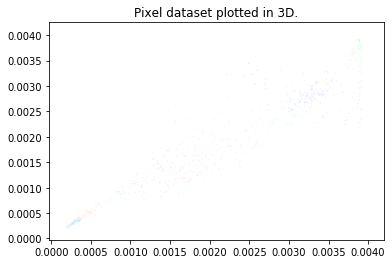

In [67]:
sel = np.floor(np.random.rand(1000,) * np.size(X, 0)).astype(int) + 1
colors = cm.rainbow(np.linspace(0, 1, K))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.reshape(X[sel, 0], -1), 
           np.reshape(X[sel, 1], -1), 
           np.reshape(X[sel, 2], -1), 
           c=np.reshape(idx[sel], -1),
           cmap=pltcolor.ListedColormap(colors), marker='o')
ax.set_title('Pixel dataset plotted in 3D.')
plt.show()

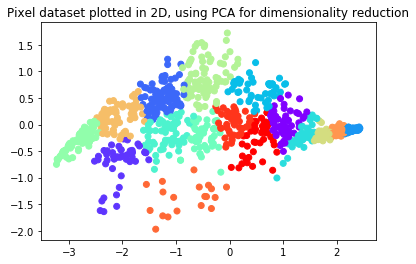

In [68]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)
colors = cm.rainbow(np.linspace(0, 1, K))
plt.scatter(
    np.reshape(Z[sel, 0], -1), 
    np.reshape(Z[sel, 1], -1), 
    c=np.reshape(idx[sel], -1), 
    cmap=pltcolor.ListedColormap(colors), marker='o')
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show()

#### 18. Соответствует ли 2D изображение какой-либо из проекций в 3D?

Не соответствует.